In [1]:
# Import the required libraries
# pandas is a powerful library used to manipulate and explore the data
import pandas as pd
import numpy as np
import itertools
# matplotlib is used to plot the data
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['text.color'] = 'k'

In [2]:
# import the data using pandas.read_csv('file_path')
df = pd.read_csv('dataset.csv')

In [3]:
# view the first 10 rows of the dataframe using df.head() function
df.head(10)

,date,vendor_id,item_id,item_price,item_cnt_day
0,02.01.2013,59,22154,999.00,1.0
1,03.01.2013,25,2552,899.00,1.0
2,05.01.2013,25,2552,899.00,-1.0
3,06.01.2013,25,2554,1709.05,1.0
4,15.01.2013,25,2555,1099.00,1.0
5,10.01.2013,25,2564,349.00,1.0
6,02.01.2013,25,2565,549.00,1.0
7,04.01.2013,25,2572,239.00,1.0
8,11.01.2013,25,2572,299.00,1.0
9,03.01.2013,25,2573,299.00,3.0


In [4]:
df.columns

Index(['date', 'vendor_id', 'item_id', 'item_price', 'item_cnt_day'], dtype='object')

In [5]:
# check whether null values are present in the dataframe with the 
# help of pandas.isnull() function
pd.isnull(df).sum()

date            0
vendor_id       0
item_id         0
item_price      0
item_cnt_day    0
dtype: int64

In [6]:
# check the data types for each columns
df.dtypes

date             object
vendor_id         int64
item_id           int64
item_price      float64
item_cnt_day    float64
dtype: object

In [7]:
# change the data type for date column to date time 
df['date'] = pd.to_datetime(df['date'])

In [8]:
df.dtypes

date            datetime64[ns]
vendor_id                int64
item_id                  int64
item_price             float64
item_cnt_day           float64
dtype: object

In [9]:
# total number of unique values in all columns
df.nunique(axis=0)

date             1034
vendor_id          60
item_id         21807
item_price      19993
item_cnt_day      198
dtype: int64

In [10]:
# Data Processing for vendor_id '25'
# applying groupby() function to group the data on vendor_id '25' 
# and set date index 
vendors = df.groupby(df['vendor_id'])
vendor_25 = vendors.get_group(25).set_index('date').drop(['vendor_id'], axis=1)

In [11]:
# I need to create a column 'revenue' for our problem statement requirement
vendor_25['revenue'] = vendor_25.item_price * vendor_25.item_cnt_day
vendor_25

,item_id,item_price,item_cnt_day,revenue
date,,,,
2013-03-01,2552,899.00,1.0,899.00
2013-05-01,2552,899.00,-1.0,-899.00
2013-06-01,2554,1709.05,1.0,1709.05
2013-01-15,2555,1099.00,1.0,1099.00
2013-10-01,2564,349.00,1.0,349.00
...,...,...,...,...
2015-10-10,7409,299.00,1.0,299.00
2015-09-10,7460,299.00,1.0,299.00
2015-10-14,7459,349.00,1.0,349.00


In [12]:
vendor_25.index

DatetimeIndex(['2013-03-01', '2013-05-01', '2013-06-01', '2013-01-15',
               '2013-10-01', '2013-02-01', '2013-04-01', '2013-11-01',
               '2013-03-01', '2013-03-01',
               ...
               '2015-10-24', '2015-10-31', '2015-11-10', '2015-10-10',
               '2015-09-10', '2015-10-10', '2015-09-10', '2015-10-14',
               '2015-10-22', '2015-03-10'],
              dtype='datetime64[ns]', name='date', length=186104, freq=None)

In [13]:
# our current datetime data can be hard to work with, therefore I will use 
# the average revenue for that month instead, and I the start of each month 
# as the timestamp.
y_25 = vendor_25['revenue'].resample('MS').mean()

In [14]:
y_25.describe()

count      36.000000
mean     1184.517828
std       288.277534
min       755.804496
25%       944.982004
50%      1188.797483
75%      1316.999558
max      1710.890430
Name: revenue, dtype: float64

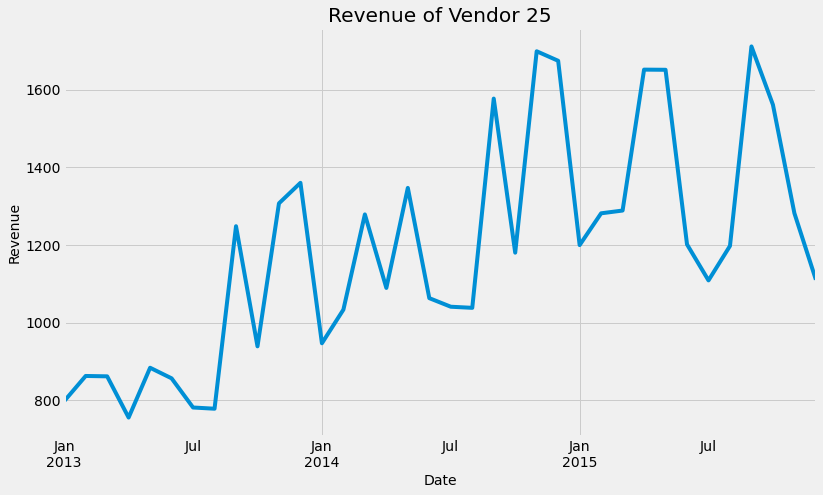

In [15]:
# visualizing revenue for vendor 25
y_25.plot(figsize=(12, 7))
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Revenue of Vendor 25')
plt.show()
# some distinguishable patterns appear when we plot the data. 
# The time-series has seasonality pattern, such as sales are always 
# low at the beginning of the year and high at the end of the year. 
# There is always an upward trend within any single year with a couple 
# of low months in the mid of the year.

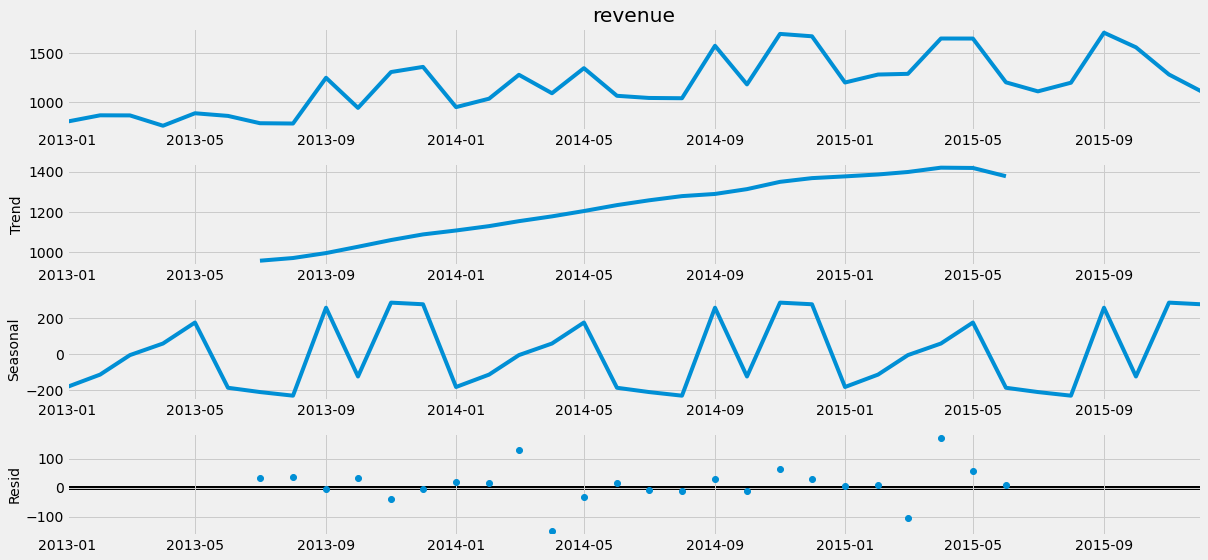

In [16]:
# I can also visualize our data using a method called time-series decomposition 
# that allows us to decompose our time series into three distinct components: 
# trend, seasonality, and noise.
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 17, 8
decomposition = sm.tsa.seasonal_decompose(y_25, model='additive')
fig = decomposition.plot()
plt.show()
# The plot shows that the data has both trend & seasonality.

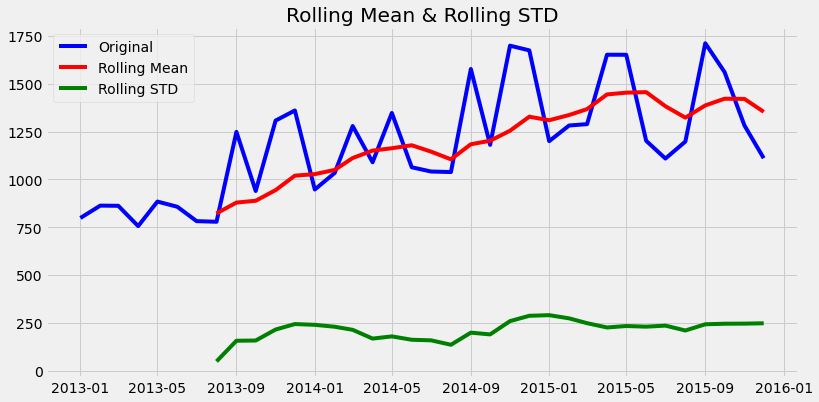

In [17]:
# Statistical test: To confirm our visual observation on the above plot, 
# I will use the Dickey-Fuller Hypothesis testing.
# import adfuller
from statsmodels.tsa.stattools import adfuller

# calculate rolling statistics
rollmean = y_25.rolling(window=8, center=False).mean()
rollstd = y_25.rolling(window=8, center=False).std()

# perform the Dickey Fuller test
dftest = adfuller(y_25)

# plot rolling statistics
fig = plt.figure(figsize=(12, 6))
orig = plt.plot(y_25, color='blue', label='Original')
mean = plt.plot(rollmean, color='red', label='Rolling Mean')
std = plt.plot(rollstd, color='green', label='Rolling STD')
plt.legend(loc='best')
plt.title('Rolling Mean & Rolling STD')
plt.show()

In [18]:
# print dickey fuller test results
print('Results of Dickey-Fuller Test')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 
                                        'p-values', '#Lags used', 
                                        'No.of observations used'])
for key, revenue in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = revenue
print(dfoutput)
# The results show that the sales are unstable.
# The hypothesis for this test is that the time series is stationary 
# because the p-value < 0.05

Results of Dickey-Fuller Test
Test Statistics            -3.319376
p-values                    0.014034
#Lags used                  0.000000
No.of observations used    35.000000
Critical Value (1%)        -3.632743
Critical Value (5%)        -2.948510
Critical Value (10%)       -2.613017
dtype: float64


In [19]:
# Time series forecasting with SARIMA
# The most commonly used method for time-series forecasting, known as SARIMA, 
# which stands for Autoregressive Integrated Moving Average.
# SARIMA models are denoted with the notation SARIMA(p, d, q). 
# These three parameters account for seasonality, trend and noise in data
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [37]:
# This step is parameter Selection for SARIMA Time Series Model. 
# Our goal here is to use a “grid search” to find the optimal set of 
# parameters that yields the best performance.
c = 0
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_25[:-1],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_invertibility=False)
            results_25 = mod.fit()
            c += 1
            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_25.aic), c)
        except:
            continue

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:598.8500873130647 1
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:578.5112172102956 2
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:329.5850923318091 3
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:325.7028761127709 4
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:535.7867471149725 5
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:533.7538551387573 6
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:325.4626936150147 7
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:327.2724481820896 8
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:566.7365145046865 9
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:546.9359117887568 10
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:325.21652612063554 11
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:325.6377122096577 12
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:521.3834932767816 13
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:523.3826173952679 14
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:325.64248345129835 15
C:\Users\luqman\anaconda3\envs\env_ml\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelih

In [21]:
# The above output suggests that SARIMAX(0, 1, 1)x(0, 1, 0, 12) yields 
# the lowest AIC value of 299.42. Therefore I should consider this to be optimal option.
mod = sm.tsa.statespace.SARIMAX(y_25[:-1],
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_invertibility=False)

results_25 = mod.fit()

print(results_25.summary().tables[1])
# It is not perfect, however, the model diagnostics suggests that the model 
# residuals are near normally distributed.

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8107      0.283     -2.868      0.004      -1.365      -0.257
sigma2      3.836e+04   7240.706      5.298      0.000    2.42e+04    5.26e+04


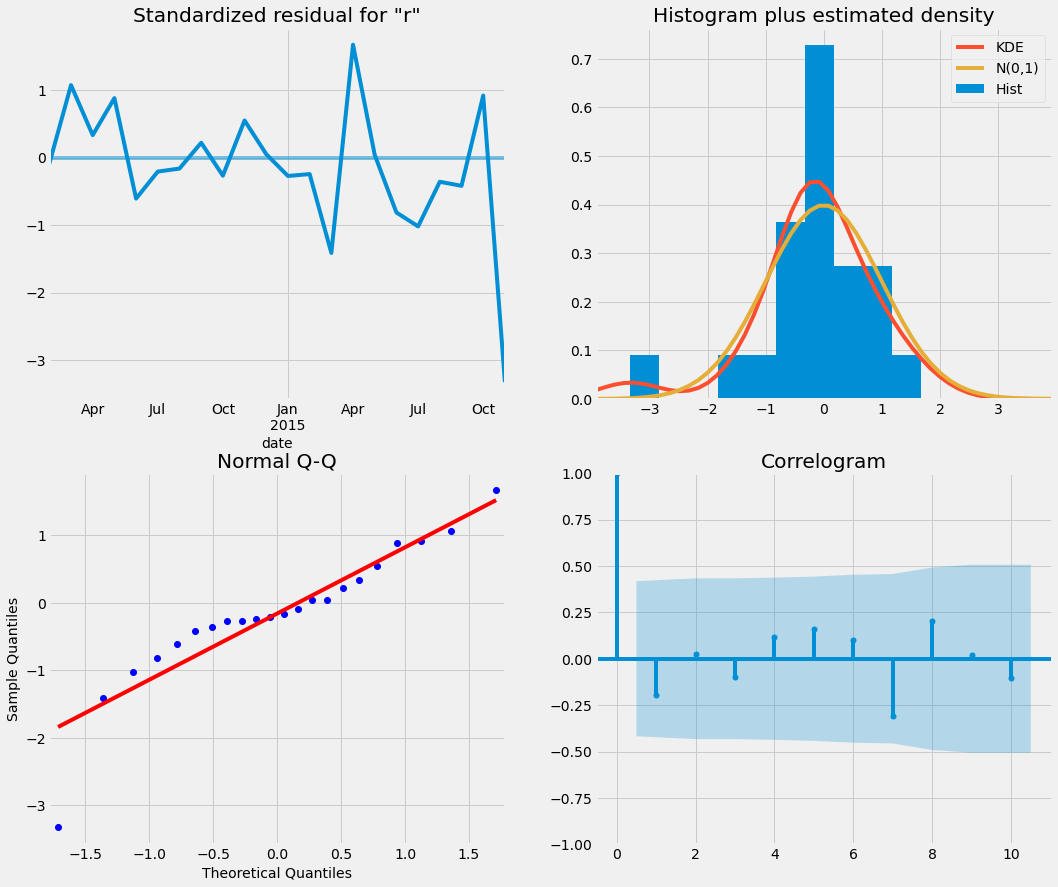

In [22]:
# Diagnostic plots for standardized residuals
results_25.plot_diagnostics(figsize=(16, 14))
plt.show()

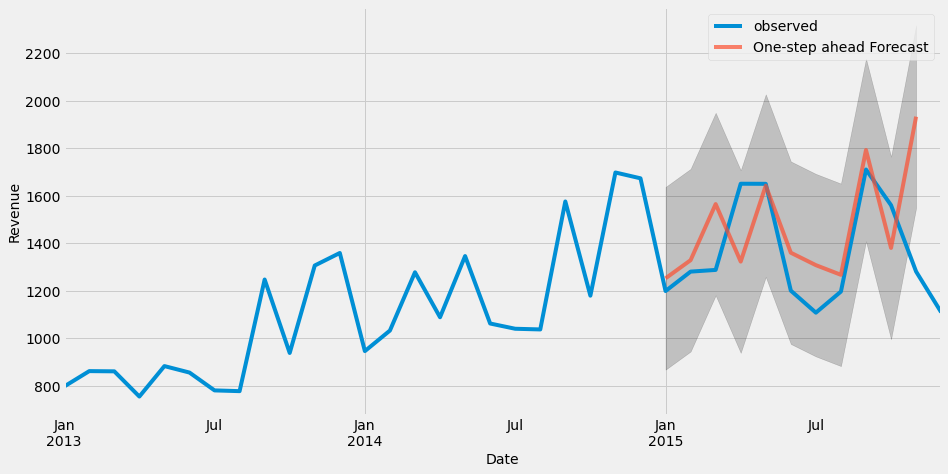

In [23]:
# Validating forecasts
# To understand the accuracy of our forecasts, we compare predicted revenue 
# to real revenue of the time series, and I set forecasts to start at 
# 2015-01-01 to the end of 2015 November.
pred_25 = results_25.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred_ci_25 = pred_25.conf_int()

ax = y_25['2013':].plot(label='observed')
pred_25.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci_25.index,
                pred_ci_25.iloc[:, 0],
                pred_ci_25.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Revenue')
plt.legend()

plt.show()
# The line plot is showing the observed values compared to the rolling forecast 
# predictions. Overall, our forecasts align with the true values well, showing 
# an upward trend starts from the beginning of the year and captured the 
# seasonality toward the end of the year.

In [24]:
y_25_forecasted = pred_25.predicted_mean
y_25_truth = y_25['2015-01-01':]
mse_25 = ((y_25_forecasted - y_25_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse_25, 2)))

The Mean Squared Error of our forecasts is 65758.46


In [25]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse_25), 2)))
# In statistics, the mean squared error (MSE) of an estimator measures the 
# average of the squares of the errors — that is, the average squared 
# difference between the estimated values and what is estimated. The MSE 
# is a measure of the quality of an estimator — it is always non-negative, 
# and the smaller the MSE, the closer we are to finding the line of best fit.

The Root Mean Squared Error of our forecasts is 256.43


In [26]:
print("Minimum: {:.1f},".format(y_25.min()), "Maximum: {:.1f}".format(y_25.max()))
# Root Mean Square Error (RMSE) tells us that our model was able to forecast 
# the average revenue in the test set within 256 of the real sales. 
# Our average revenue ranges from around 755 to over 1700. In my opinion, 
# this is a pretty good model so far.

Minimum: 755.8, Maximum: 1710.9


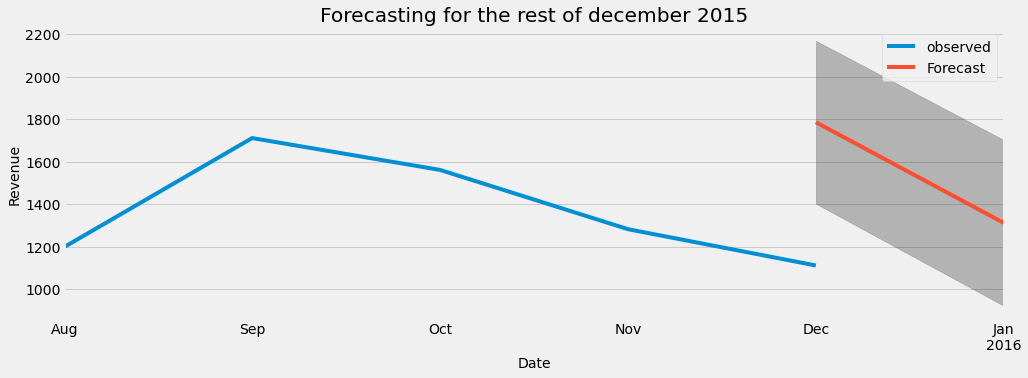

In [27]:
# Producing and visualizing forecasts 

pred_uc_25 = results_25.get_forecast(steps=2)
pred_ci_25 = pred_uc_25.conf_int()

ax = y_25['2015-08-01':].plot(label='observed', figsize=(15, 5))
pred_uc_25.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci_25.index,
                pred_ci_25.iloc[:, 0],
                pred_ci_25.iloc[:, 1], color='k', alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('Revenue')
plt.title('Forecasting for the rest of december 2015')
plt.legend()
plt.show()

In [28]:
# Revenue Prediction monthly Vendor_id 25, from december 10 2015 to december 31 2018
pred_res_25 = results_25.get_forecast(steps=37).predicted_mean
res_25 = pd.DataFrame([y_25['2015-12-10':], pred_res_25]).mean()
#res_25

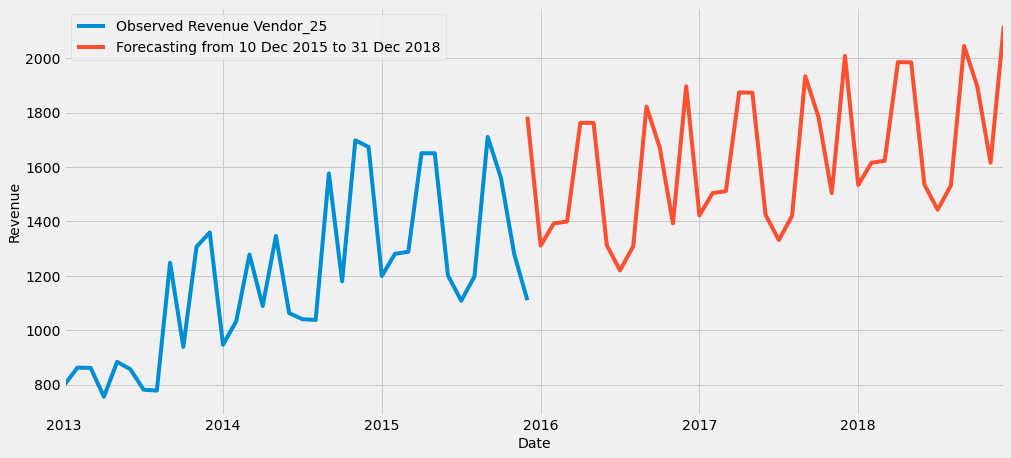

In [29]:
ax = y_25.plot(label='Observed Revenue Vendor_25', figsize=(15, 7))
res_25.plot(ax=ax, label='Forecasting from 10 Dec 2015 to 31 Dec 2018')
ax.set_xlabel('Date')
ax.set_ylabel('Revenue')
plt.legend()
plt.show()

In [30]:
# Our model clearly captured seasonality. As we forecast further out into the future, 
# it is natural to become less confident in our values. This is reflected by the 
# confidence intervals generated by our model, which grow larger as we move further 
# out into the future.